In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
main_df=pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=416&path=medical_insurance_cost.csv")

In [3]:
main_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
main_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_df,test_df=train_test_split(main_df,random_state=46)

In [7]:
train_df=pd.get_dummies(train_df,drop_first=True)

In [8]:
train_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
662,32,31.540,1,5148.55260,False,False,False,False,False
784,31,29.260,1,4350.51440,False,False,False,True,False
751,21,28.975,0,1906.35825,True,False,True,False,False
1142,52,24.860,0,27117.99378,False,False,False,True,False
1286,28,17.290,0,3732.62510,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
658,48,35.910,1,26392.26029,False,False,False,False,False
403,49,32.300,3,10269.46000,True,False,True,False,False
442,18,43.010,0,1149.39590,True,False,False,True,False
837,56,28.310,0,11657.71890,False,False,False,False,False


In [9]:
train_df.isna().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [10]:
x_train= train_df.drop(columns=['charges'])
y_train= train_df['charges']

In [11]:
x_train=pd.get_dummies(x_train,drop_first=True)

In [12]:
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
662,32,31.540,1,False,False,False,False,False
784,31,29.260,1,False,False,False,True,False
751,21,28.975,0,True,False,True,False,False
1142,52,24.860,0,False,False,False,True,False
1286,28,17.290,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...
658,48,35.910,1,False,False,False,False,False
403,49,32.300,3,True,False,True,False,False
442,18,43.010,0,True,False,False,True,False
837,56,28.310,0,False,False,False,False,False


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linreq_model=LinearRegression()
linreq_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
train_preds=linreq_model.predict(x_train)

In [16]:
train_preds

array([ 7416.02965285,  5339.97985438,  2898.83111279, ...,
        5852.74261156, 11899.6979995 , 13160.45124023], shape=(1003,))

Text(0, 0.5, 'predict charges')

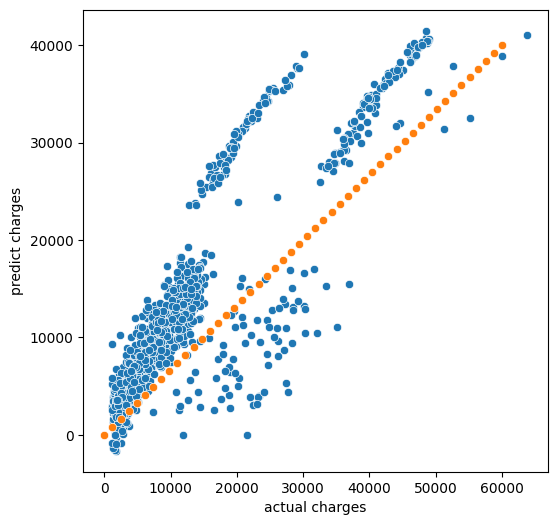

In [17]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_train,y=train_preds)
sns.scatterplot(x=np.linspace(0,60000),y=np.linspace(0,40000))
plt.xlabel("actual charges")
plt.ylabel("predict charges")

<Axes: xlabel='charges', ylabel='Count'>

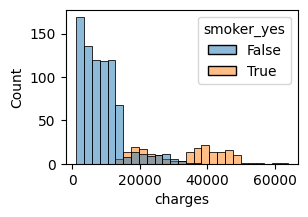

In [18]:
plt.figure(figsize=(3,2))
sns.histplot(x=y_train,hue=train_df['smoker_yes'])

Metrik/	                                            Mantığı/	                              Ne Zaman Kullanılır?	                           

/Örnek

MAE (Mean Absolute Error):	Tahminler ile gerçek değer arasındaki ortalama mutlak fark/	Genel hatayı görmek istediğinde/	Model ortalama olarak 10.000$ sapıyor mu?

Metrik	/                             Mantığı   /                                             Ne Zaman Kullanılır?
                                                                  
MSE (Mean Squared Error):    Farkları kareye alır → büyük hataları daha çok cezalandırır/   Büyük hataların ciddi problem olduğu durumlarda

Örnek

Çok pahalı evler varsa ve büyük hataları vurgulamak istiyorsan                     
	                                                    

Metrik	/                             Mantığı   /                                             Ne Zaman Kullanılır?

RMSE (Root MSE):MSE’nin karekökü → hata birimi orijinal birimle olur/Hata birimini anlamak istediğinde/Ev fiyatı tahmininde $ olarak hata ölçmek istiyorsan

In [19]:
from sklearn .metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

metrik	/                             Mantığı   /                                             Ne Zaman Kullanılır?

R² (Coefficient of Determination):Modelin verideki değişimi ne kadar açıkladığını gösterir/Modelin başarısını genel olarak görmek istediğinde
R² = 0.9 → model hedefi %90 oranında açıklıyor

In [20]:
print("on the data set")
print(f"mean absolute error : { mean_absolute_error(y_true=y_train,y_pred=train_preds)}")#ortalama hatayı görmek istediğinde
print(f"root mean squared< error : { root_mean_squared_error(y_true=y_train,y_pred=train_preds)}")#bu data cinsinden olan
print(f"mean squared error: {mean_squared_error(y_true=y_train,y_pred=train_preds)}")#bu hataları ağır cezalandıran
print(f"R^2 score : {r2_score(y_true = y_train, y_pred=train_preds)}")#yüzde olarak başarısı

on the data set
mean absolute error : 4209.782926501409
root mean squared< error : 6047.652525545774
mean squared error: 36574101.069740176
R^2 score : 0.7562129736620669


In [21]:
# y_train= train_df['charges']
#train_preds=linreq_model.predict(x_train)
train_residuals = train_preds - y_train

In [22]:
#lets do the same thing for our test data
x_test = test_df.drop(columns=['charges'])
y_test = test_df['charges']


In [23]:
x_test

,age,sex,bmi,children,smoker,region
141,26,male,32.490,1,no,northeast
1065,42,female,25.300,1,no,southwest
467,56,female,33.820,2,no,northwest
557,34,male,34.210,0,no,southeast
166,20,female,37.000,5,no,southwest
...,...,...,...,...,...,...
56,58,female,31.825,2,no,northeast
45,55,male,37.300,0,no,southwest
742,53,male,34.105,0,yes,northeast
1160,43,female,34.580,1,no,northwest


In [24]:
x_test = pd.get_dummies(x_test)

In [25]:
x_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
141,26,32.49,1,False,True,True,False,True,False,False,False
1065,42,25.30,1,True,False,True,False,False,False,False,True
467,56,33.82,2,True,False,True,False,False,True,False,False
557,34,34.21,0,False,True,True,False,False,False,True,False
166,20,37.00,5,True,False,True,False,False,False,False,True


In [26]:
x_test = x_test[x_train.columns]


In [27]:
x_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
141,26,32.490,1,True,False,False,False,False
1065,42,25.300,1,False,False,False,False,True
467,56,33.820,2,False,False,True,False,False
557,34,34.210,0,True,False,False,True,False
166,20,37.000,5,False,False,False,False,True
...,...,...,...,...,...,...,...,...
56,58,31.825,2,False,False,False,False,False
45,55,37.300,0,True,False,False,False,True
742,53,34.105,0,True,True,False,False,False
1160,43,34.580,1,False,False,True,False,False


In [28]:
test_preds = linreq_model.predict(x_test)

Text(0, 0.5, 'predict charges (test dataset)')

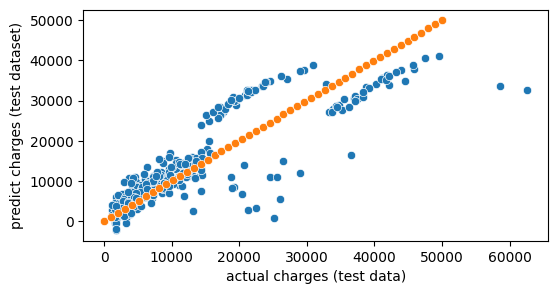

In [31]:
plt.figure(figsize=(6,3))
sns.scatterplot(x = y_test, y= test_preds)
sns.scatterplot(x=np.linspace(0,50000),y=np.linspace(0,50000))
plt.xlabel("actual charges (test data)")
plt.ylabel("predict charges (test dataset)")


In [35]:
print ("on the data set")
print(f"mean absolute error:{round(mean_absolute_error(y_true=y_test,y_pred=test_preds))}")
print(f"mean squared error : {round(mean_squared_error(y_true=y_test,y_pred=test_preds))}")
print(f"root mean squared error : {round(root_mean_squared_error(y_true=y_test,y_pred=test_preds))}")

on the data set
mean absolute error:4217
mean squared error : 36781093
root mean squared error : 6065


In [40]:
test_residuals= test_preds - y_test

<Axes: xlabel='charges', ylabel='Count'>

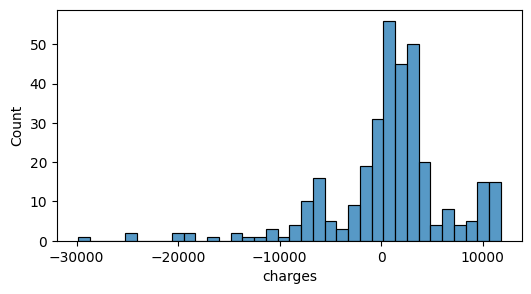

In [41]:
plt.figure(figsize=(6,3))
sns.histplot(x=test_residuals)

In [43]:
from sklearn.metrics import accuracy_score


In [46]:
"""
print(f"accuracy_score : {accuracy_score(y_true=y_test,y_pred=test_preds)}")
"""
#bu kod çalışmıyo çünkğ accuracy_score 0,1 arası değer ister lineer de çalışmaz

'\nprint(f"accuracy_score : {accuracy_score(y_true=y_test,y_pred=test_preds)}")\n'